# MO433 - Introdução ao Processamento Digital de Imagem: Trabalho 02 

Nesse trabalho se explorará as diferentes aplicações da transformada de fourier. Trabalhando com imagens no domínio da frequência devido à transformada de Fourier Discreta pode-se então aplicar filtros de maneira mais fácil, usando as propriedades.

In [1]:
# Carregando bibliotecas e variáveis comuns
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage

notebook = False

In [11]:
if(notebook):
  #Carregando imagens para fins de teste
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_png/baboon.png
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_png/butterfly.png
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_png/city.png
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_png/house.png
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_png/seagull.png


In [10]:
if(not notebook):
  try:
    arquivo = sys.argv[1]   
  except:
    print("Sintaxe: trabalho02.py  filename")

  img = cv.imread(arquivo,0)

Sintaxe: trabalho02.py  filename


NameError: ignored

## A transfomada de fourier e seus usos

In [15]:
arquivo = "baboon.png"
img = cv.imread(arquivo,0)

## Transformada direta e transformada inversa

In [16]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
espectroMagnitudeNormal = 20*np.log(np.abs(fshift))
f_ishift = np.fft.ifftshift(fshift)
invfft = abs(np.fft.ifft2(f_ishift))



if(notebook):
  plt.figure(figsize = [20,10])
  plt.subplot(131),plt.imshow(img, cmap = 'gray')
  plt.title('Imagem de Entrada'), plt.xticks([]), plt.yticks([])
  plt.subplot(132),plt.imshow(espectroMagnitudeNormal, cmap = 'gray')
  plt.title('Espectro de Magnitude'), plt.xticks([]), plt.yticks([])
  plt.subplot(133),plt.imshow(invfft, cmap = 'gray')
  plt.title('Transformada Inversa'), plt.xticks([]), plt.yticks([])
  plt.show()

cv.imwrite("espectroMagnitude_" + arquivo, espectroMagnitudeNormal)

True

## Rotação do espectro

In [17]:
rotated = ndimage.rotate(img, 45)
f = np.fft.fft2(rotated)
fshift = np.fft.fftshift(f)
espectroMagnitudeRotacionado = 20*np.log(np.abs(fshift))
f_ishift = np.fft.ifftshift(fshift)
invfft = abs(np.fft.ifft2(f_ishift))

if(notebook):
  plt.figure(figsize = [20,10])
  plt.subplot(131),plt.imshow(rotated, cmap = 'gray')
  plt.title('Imagem de Entrada'), plt.xticks([]), plt.yticks([])
  plt.subplot(132),plt.imshow(espectroMagnitudeRotacionado, cmap = 'gray')
  plt.title('Espectro de Magnitude - Imagem Rotacionada'), plt.xticks([]), plt.yticks([])
  plt.subplot(133),plt.imshow(espectroMagnitudeNormal, cmap = 'gray')
  plt.title('Espectro de Magnitude - Imagem Original'), plt.xticks([]), plt.yticks([])
  plt.show()

cv.imwrite("espectroRotacionado_" + arquivo, espectroMagnitudeRotacionado)

True

## Aplicação do filtro passa-baixa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


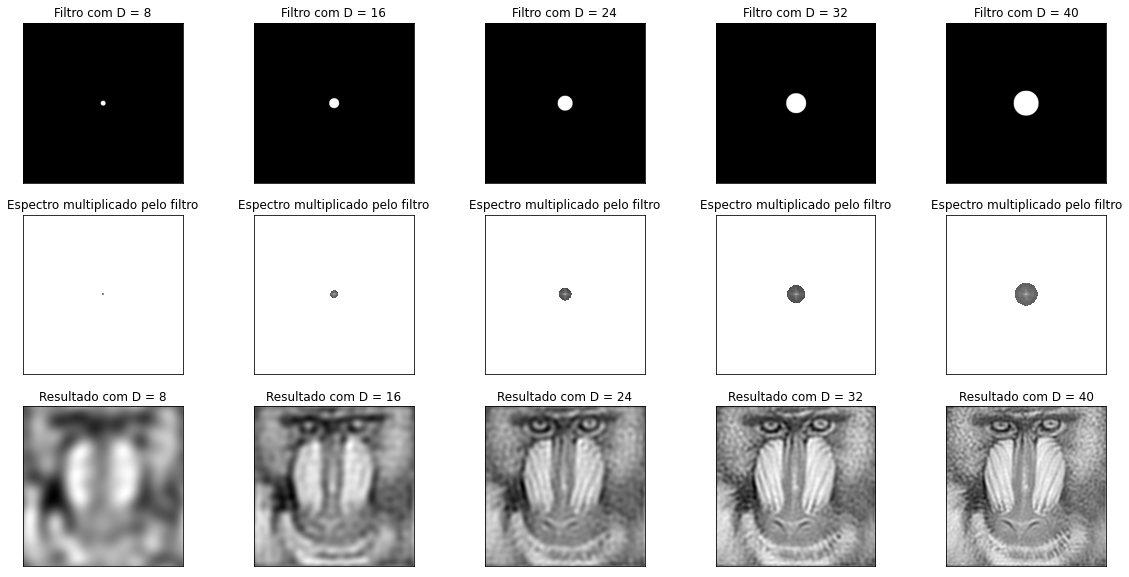

In [28]:
# Gerando os 5 filtros de tamanhos distintos

#filtros_lp = np.empty_like(img)
filtros_lp = np.empty_like(img)
nfiltros = 6
passoRaio = 8

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

#Gerando os filtros ideais
for i in range(1, nfiltros):
  filtro = np.zeros_like(img)
  cv.circle(filtro, (int(filtro.shape[0]/2),int(filtro.shape[1]/2)), radius = passoRaio*i , color = 255, thickness = -1)
  filtros_lp = np.dstack((filtros_lp, filtro))

#Gerando os filtros gaussianos
for i in range(1, nfiltros):
  filtro = np.zeros_like(img)

if(notebook):
  plt.figure(figsize=[20,10])

for j in range(1, nfiltros):
  filtrado  = fshift * filtros_lp[:,:,j]

  if(notebook):
    plt.subplot(3,5,j)
    plt.title("Filtro com D = " + str(j*passoRaio)), plt.xticks([]), plt.yticks([])
    plt.imshow(filtros_lp[:,:,j], cmap="gray")

    plt.subplot(3,5,j+5)
    plt.title("Espectro multiplicado pelo filtro"), plt.xticks([]), plt.yticks([])
    plt.imshow(20*np.log(np.abs(filtrado)), cmap="gray")

  f_ishift = np.fft.ifftshift(filtrado)
  invfft = abs(np.fft.ifft2(f_ishift))
  if(notebook):
    plt.subplot(3,5,j+10)
    plt.title("Resultado com D = " + str(j*passoRaio)), plt.xticks([]), plt.yticks([])
    plt.imshow(invfft, cmap="gray")
  cv.imwrite("passaBaixa_" + str(j*passoRaio) + "_" + arquivo, invfft/np.max(invfft)*255)

## Aplicacao do filtro passa-alta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


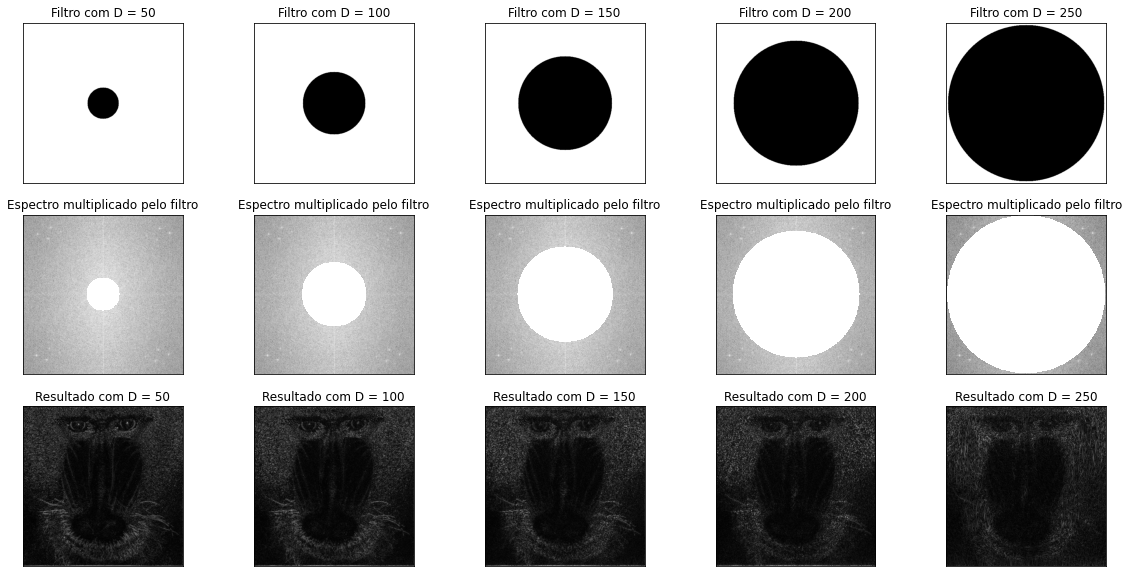

In [30]:
# Gerando os 5 filtros de tamanhos distintos

filtros_hp = 255 * np.ones_like(img)
nfiltros = 6
passoRaio = 50

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

for i in range(1, nfiltros):
  filtro = 255 * np.ones_like(img)
  cv.circle(filtro, (int(filtro.shape[0]/2),int(filtro.shape[1]/2)), radius = passoRaio *i , color = 0, thickness = -1)
  filtros_hp = np.dstack((filtros_hp, filtro))

if(notebook):
  plt.figure(figsize=[20,10])

for j in range(1, nfiltros):
  filtrado  = fshift * filtros_hp[:,:,j]

  if(notebook):
    plt.subplot(3,5,j)
    plt.title("Filtro com D = " + str(j*passoRaio)), plt.xticks([]), plt.yticks([])
    plt.imshow(filtros_hp[:,:,j], cmap="gray")

    plt.subplot(3,5,j+5)
    plt.title("Espectro multiplicado pelo filtro"), plt.xticks([]), plt.yticks([])
    plt.imshow(20*np.log(np.abs(filtrado)), cmap="gray")

  f_ishift = np.fft.ifftshift(filtrado)
  invfft = abs(np.fft.ifft2(f_ishift))

  if(notebook):
    plt.subplot(3,5,j+10)
    plt.title("Resultado com D = " + str(j*passoRaio)), plt.xticks([]), plt.yticks([])
    plt.imshow(invfft, cmap="gray")
  
  cv.imwrite("passaAlta_" + str(j*passoRaio) + "_" + arquivo, invfft/np.max(invfft)*255)

## Aplicacao do filtro passa-faixa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


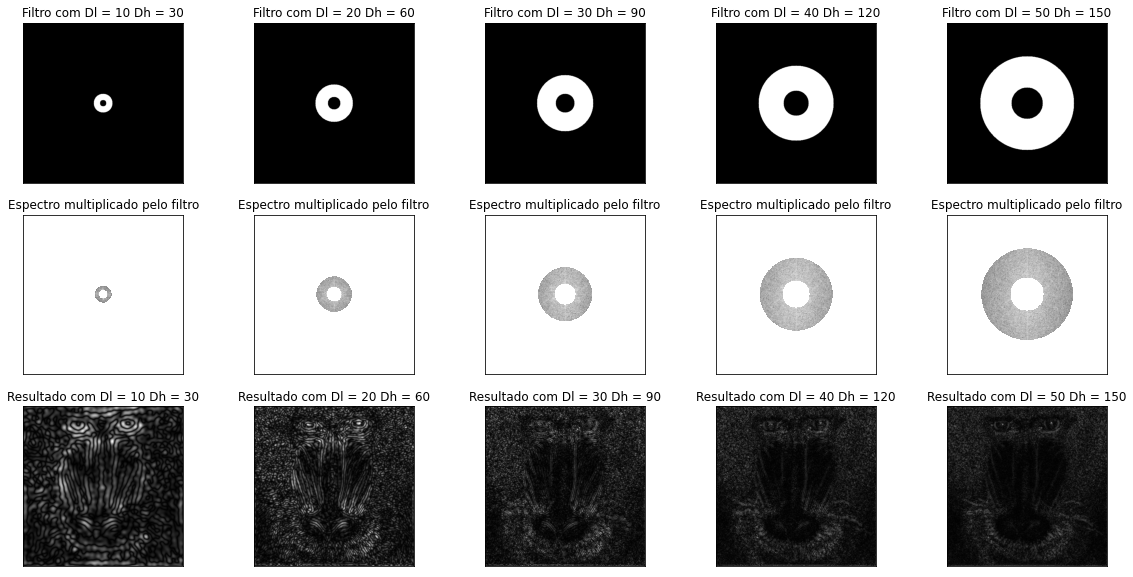

In [31]:
filtros_bp = np.empty_like(img)
# Gerando os 5 filtros de tamanhos distintos

filtros_bp = np.zeros_like(img)
nfiltros = 6

passoRaioMaior = 30
passoRaioMenor = 10

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

for i in range(1, nfiltros):
  filtro = 255 * np.zeros_like(img)
  cv.circle(filtro, (int(filtro.shape[0]/2),int(filtro.shape[1]/2)), radius = passoRaioMaior * i , color = 255, thickness = -1)
  cv.circle(filtro, (int(filtro.shape[0]/2),int(filtro.shape[1]/2)), radius = passoRaioMenor * i , color = 0, thickness = -1)
  filtros_bp = np.dstack((filtros_bp, filtro))

if(notebook):
  plt.figure(figsize=[20,10])

for j in range(1, nfiltros):
  filtrado  = fshift * filtros_bp[:,:,j]
  if(notebook):
    plt.subplot(3,5,j)
    plt.title("Filtro com Dl = " + str(j*passoRaioMenor) + " Dh = " + str(j*passoRaioMaior)), plt.xticks([]), plt.yticks([])
    plt.imshow(filtros_bp[:,:,j], cmap="gray")

    plt.subplot(3,5,j+5)
    plt.title("Espectro multiplicado pelo filtro"), plt.xticks([]), plt.yticks([])
    plt.imshow(20*np.log(np.abs(filtrado)), cmap="gray")

  f_ishift = np.fft.ifftshift(filtrado)
  invfft = abs(np.fft.ifft2(f_ishift))
  
  if(notebook):
    plt.subplot(3,5,j+10)
    plt.title("Resultado com Dl = " + str(j*passoRaioMenor) + " Dh = " + str(j*passoRaioMaior)), plt.xticks([]), plt.yticks([])
    plt.imshow(invfft, cmap="gray")

  cv.imwrite("passaFaixa_" + str(j*passoRaioMenor)+ "-" + str(j*passoRaioMaior)+ "_" + arquivo, invfft/np.max(invfft)*255)

## Aplicacao da compressão




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


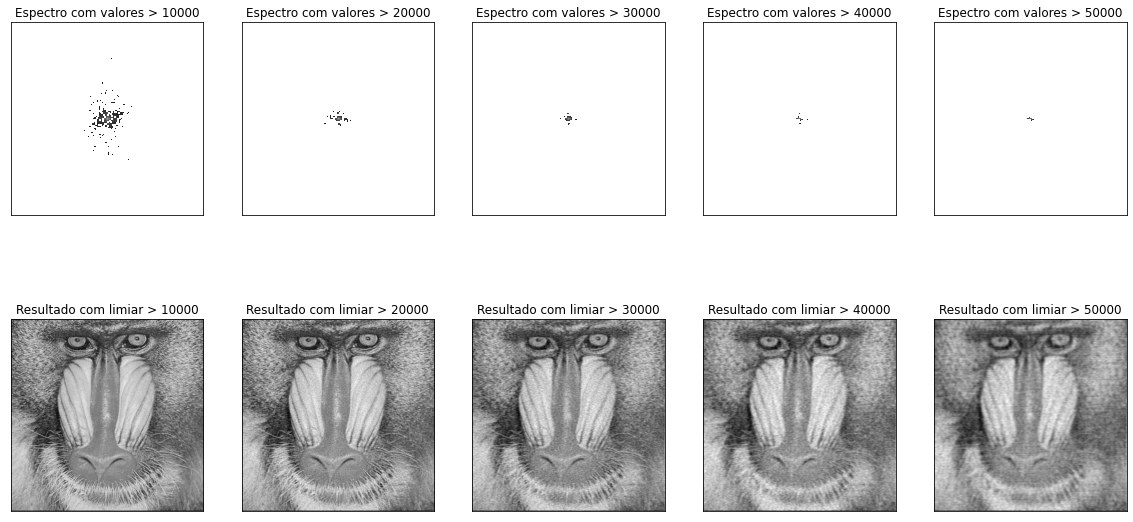

In [32]:
# Gerando os 5 filtros de tamanhos distintos
nfiltros = 6
passoLimiar = 10000

espectro_comprimido = np.zeros_like(img)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift_mod = np.copy(fshift)

for i in range(1, nfiltros):
  fshift_mod = np.copy(fshift)
  fshift_mod [abs(fshift_mod) < i * passoLimiar] = 0
  espectro_comprimido = np.dstack((espectro_comprimido, fshift_mod))

if(notebook):
  plt.figure(figsize=[20,10])

for j in range(1, nfiltros):
  if(notebook):
    plt.subplot(2,5,j)
    plt.title("Espectro com valores > " + str(j*passoLimiar)), plt.xticks([]), plt.yticks([])
    plt.imshow(20*np.log(np.abs(espectro_comprimido[:,:,j])), cmap="gray")

  filtrado  = espectro_comprimido[:,:,j]
  f_ishift = np.fft.ifftshift(filtrado)
  invfft = abs(np.fft.ifft2(f_ishift))

  if(notebook):
    plt.subplot(2,5,j+5)
    plt.title("Resultado com limiar > " + str(j*passoLimiar)), plt.xticks([]), plt.yticks([])
    plt.imshow(invfft, cmap="gray")
  cv.imwrite("comprimido_" + str(j*passoLimiar)+ "_" + arquivo, invfft/np.max(invfft)*255)
  